In [150]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

In [1]:
test = """
498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9
""".strip()

In [76]:
with open('input.txt', 'r') as f:
    input_ = f.read().strip()

# Part 1

In [125]:
ROCK = 1
SAND = 2

def build_cave(input_, cave_size):
    min_x = 500 - cave_size // 2
    cave = np.zeros((cave_size, cave_size))
    lines = input_.splitlines()
    for line in lines:
        path_coords_txt = [xy.split(',') for xy in line.split(' -> ')]
        path_coords = [(int(x) - min_x, int(y)) for x, y in path_coords_txt]

        for idx in range(1, len(path_coords)):
            pos, next_ = path_coords[idx-1], path_coords[idx]
            x1, x2 = sorted([pos[1], next_[1]])
            y1, y2 = sorted([pos[0], next_[0]])
            cave[x1:x2+1, y1:y2+1] = ROCK
    return cave, min_x

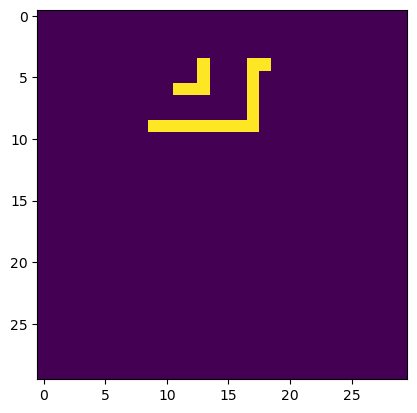

In [126]:
cave, min_x = build_cave(test, cave_size=30)
plt.imshow(cave)

In [228]:
def drip(cave, min_x, image_every):
    sand_initial_pos = (500 - min_x, 0)
    moves = [
        (0, +1),
        (-1, +1),
        (1, +1),
    ]

    dripping = True
    s = sand_initial_pos
    i = 0
    images = []
    fig, ax = plt.subplots()
    while dripping:
        for m in moves:
            x, y = s[0] + m[0], s[1] + m[1]
            if y == cave_size:
                dripping = False
                break
            if cave[y, x] == 0:
                s = (x, y)
                break
        else:
            cave[s[1], s[0]] = SAND
            s = sand_initial_pos
            if i % image_every == 0:
                #plt.title(f't = {i}')
                im = plt.imshow(cave, cmap='magma', animated=True)
                images.append([im])
            i += 1
    return images, fig


24

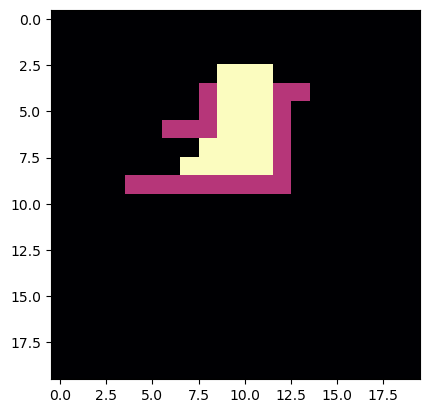

In [229]:
cave_size = 20
cave, min_x = build_cave(test, cave_size=cave_size)
images, fig = drip(cave, min_x, image_every=10)
(cave == SAND).sum()

885

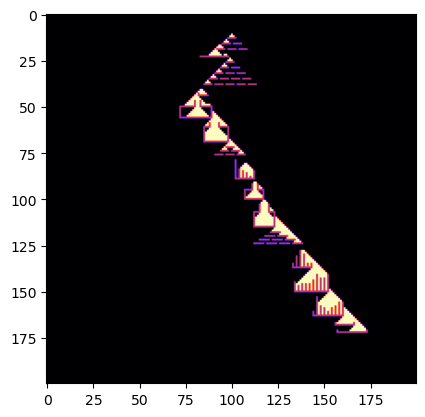

In [232]:
cave_size = 200
cave, min_x = build_cave(input_, cave_size=cave_size)
images, fig = drip(cave, min_x, image_every=1)
(cave == SAND).sum()

In [234]:
ani = animation.ArtistAnimation(fig, images, interval=10, blit=True,
                                repeat_delay=1000)
ani.save('sand.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


# Part 2

In [192]:
def build_cave_with_floor(input_, cave_size):
    min_x = 500 - cave_size // 2
    cave = np.zeros((cave_size, cave_size))
    lines = input_.splitlines()
    max_y = 0
    for line in lines:
        path_coords_txt = [xy.split(',') for xy in line.split(' -> ')]
        path_coords = [(int(x) - min_x, int(y)) for x, y in path_coords_txt]

        for idx in range(1, len(path_coords)):
            pos, next_ = path_coords[idx-1], path_coords[idx]
            x1, x2 = sorted([pos[1], next_[1]])
            y1, y2 = sorted([pos[0], next_[0]])
            cave[x1:x2+1, y1:y2+1] = ROCK
            if x2 > max_y:
                max_y = x2
    cave[max_y + 2, :] = ROCK
    return cave, min_x

In [221]:
def drip_with_floor(cave, min_x, image_every):
    sand_initial_pos = (500 - min_x, 0)
    moves = [
        (0, +1),
        (-1, +1),
        (1, +1),
    ]

    dripping = True
    s = sand_initial_pos
    i = 0
    images = []
    fig, ax = plt.subplots()
    while dripping:
        for m in moves:
            x, y = s[0] + m[0], s[1] + m[1]
            if cave[y, x] == 0:
                s = (x, y)
                break
        else:
            if s == sand_initial_pos:
                dripping = False
            cave[s[1], s[0]] = SAND
            s = sand_initial_pos
            if i % image_every == 0:
                #plt.title(f't = {i}')
                im = plt.imshow(cave[:200], cmap='magma', animated=True)
                images.append([im])
            i += 1
    return images, fig
        

93

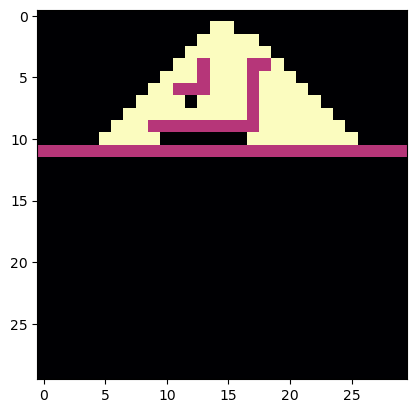

In [222]:
cave, min_x = build_cave_with_floor(test, cave_size=30)
images, fig = drip_with_floor(cave, min_x, image_every=10)
(cave == SAND).sum()

28691

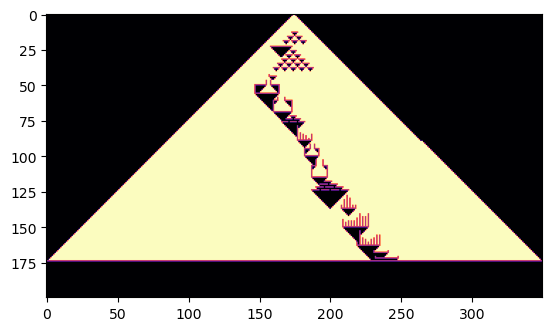

In [223]:
cave, min_x = build_cave_with_floor(input_, cave_size=350)
images, fig = drip_with_floor(cave, min_x, image_every=100)
(cave == SAND).sum()

In [224]:
ani = animation.ArtistAnimation(fig, images, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('sand_with_floor.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
